# Homework 5
B06201053 數學四 鄭心慈

Price an arithmetic average call with the following payoff using the binomial tree model.

$$
\text{Payoff}_{\tau}=\max(S_{ave,\tau}−K,0),
$$

where $S_{ave,\tau}$ is the arithmetic average of stock prices from the issue date until the current time point $\tau$.

## Basic requirement (80 points)

(i) Implement the binomial tree model to price both European and American arithmetic average calls.

(ii) Implement the Monte Carlo simulation to price European arithmetic average calls.

>Inputs: $S_t$, $K$, $r$, $q$, $\sigma$, $t$, $T-t$, $M$, $n$, $S_{ave,t}$, number of simulations, number of repetitions.

>Outputs: Option values for both methods and 95% confidence interval for Monte Carlo simulation.

In [2]:
import numpy as np

In [3]:
### input

In [4]:
S_t0=float(input('Please input S_t: '))

Please input S_t: 50


In [5]:
K=float(input('Please input K: '))

Please input K: 50


In [6]:
r=float(input('Please input r: '))

Please input r: 0.1


In [7]:
q=float(input('Please input q: '))

Please input q: 0.05


In [8]:
sigma=float(input('Please input sigma: '))

Please input sigma: 0.8


In [9]:
t0=float(input('Please input t: '))

Please input t: 0


In [10]:
T=float(input('Please input T-t: '))+t0

Please input T-t: 0.25


In [11]:
M=int(input('Please input M: '))

Please input M: 100


In [12]:
n=int(input('Please input n: '))

Please input n: 100


In [13]:
S_ave_t0=float(input('Please input S_ave,t: '))

Please input S_ave,t: 50


In [66]:
n_si=int(input('Please input number of simulations: '))

Please input number of simulations: 10000


In [67]:
n_re=int(input('Please input number of repetitions: '))

Please input number of repetitions: 20


In [13]:
### binomial tree model

In [14]:
n_before=int(n*t0/(T-t0))
dt=(T-t0)/n
u=np.exp(sigma*np.sqrt(dt))
d=1/u
p=(np.exp((r-q)*dt)-d)/(u-d)

In [15]:
import math

In [17]:
### European option
def BT_average_E_option_price(S_t0, K, r, q, sigma, dt, t0, T, n_before, M, n, S_ave_t0):
    S_t=np.zeros((n+1, n+1))
    for i in range(n-1, n+1, 1):
        for j in range(0, i+1, 1):
            S_t[i,j]=S_t0*u**(i-j)*d**j
    if n%2: # n是奇數
        S_t[n-1,math.floor(n/2)]=S_t0
    else: # n是偶數
        S_t[n,math.floor(n/2)]=S_t0
    for i in range(n-2, -1, -1):
        for j in range(0, i+1, 1):
            S_t[i,j]=S_t[i+2,j+1]
    # average price
    S_ave=np.zeros((n+1, n+1, M+1))
    S_ave[0,0,0]=S_ave_t0
    for i in range(1, n+1, 1):
        for j in range(0, i+1, 1):
            S_ave[i,j,0]=(S_ave[0,0,0]*(n_before+1)+S_ave[0,0,0]*u*(1-u**(i-j))/(1-u)+S_ave[0,0,0]*u**(i-j)*d*(1-d**j)/(1-d))/(n_before+i+1)
            S_ave[i,j,M]=(S_ave[0,0,0]*(n_before+1)+S_ave[0,0,0]*d*(1-d**j)/(1-d)+S_ave[0,0,0]*d**j*u*(1-u**(i-j))/(1-u))/(n_before+i+1)
            for k in range(1, M, 1):
                S_ave[i,j,k]=((M-k)*S_ave[i,j,0]+k*S_ave[i,j,M])/M
    call=np.zeros((n+1, n+1, M+1))
    # i=n
    for j in range(0, n+1, 1):
        for k in range(0, M+1, 1):
            call[n,j,k]=max(S_ave[n,j,k]-K,0)
    # backward induction
    for i in range(n-1, -1, -1):
        for j in range(0, i+1, 1):
            for k in range(0, M+1, 1):
                A_u=((i+n_before+1)*S_ave[i,j,k]+S_t[i+1,j])/(i+n_before+2) #S_t0*u**(i+1-j)*d**j
                A_d=((i+n_before+1)*S_ave[i,j,k]+S_t[i+1,j+1])/(i+n_before+2) #S_t0*u**(i+1-j-1)*d**(j+1)
                # sequential search
                if A_u>S_ave[i+1,j,0]:
                    C_u=call[i+1,j,0]
                elif A_u<S_ave[i+1,j,M]:
                    C_u=call[i+1,j,M]
                else: 
                    for k_u in range(0, M+1, 1):
                        if A_u<S_ave[i+1,j,k_u]:
                            continue
                        elif A_u==S_ave[i+1,j,k_u]:
                            C_u=call[i+1,j,k_u]
                            break
                        elif A_u>S_ave[i+1,j,k_u]:
                            if S_ave[i+1,j,k_u-1]-S_ave[i+1,j,k_u]==0:
                                w_u=0
                            else:
                                w_u=(S_ave[i+1,j,k_u-1]-A_u)/(S_ave[i+1,j,k_u-1]-S_ave[i+1,j,k_u])
                            C_u=w_u*call[i+1,j,k_u]+(1-w_u)*call[i+1,j,k_u-1]
                            break
                if A_d>S_ave[i+1,j+1,0]:
                    C_d=call[i+1,j+1,0]
                elif A_d<S_ave[i+1,j+1,M]:
                    C_d=call[i+1,j+1,M]
                else:
                    for k_d in range(0, M+1, 1):
                        if A_d<S_ave[i+1,j+1,k_d]:
                            continue
                        elif A_d==S_ave[i+1,j+1,k_d]:
                            C_d=call[i+1,j+1,k_d]
                            break
                        if A_d>S_ave[i+1,j+1,k_d]:
                            if S_ave[i+1,j+1,k_d-1]-S_ave[i+1,j+1,k_d]==0:
                                w_d=0
                            else:
                                w_d=(S_ave[i+1,j+1,k_d-1]-A_d)/(S_ave[i+1,j+1,k_d-1]-S_ave[i+1,j+1,k_d])
                            C_d=w_d*call[i+1,j+1,k_d]+(1-w_d)*call[i+1,j+1,k_d-1]
                            break
                call[i,j,k]=(p*C_u+(1-p)*C_d)*np.exp(-r*dt)
    return call

print('The option value is', BT_average_E_option_price(S_t0, K, r, q, sigma, dt, t0, T, n_before, M, n, S_ave_t0))

The option value is [[[  4.73538535   4.73538535   4.73538535 ...   4.73538535   4.73538535
     4.73538535]
  [  0.           0.           0.         ...   0.           0.
     0.        ]
  [  0.           0.           0.         ...   0.           0.
     0.        ]
  ...
  [  0.           0.           0.         ...   0.           0.
     0.        ]
  [  0.           0.           0.         ...   0.           0.
     0.        ]
  [  0.           0.           0.         ...   0.           0.
     0.        ]]

 [[  5.82192671   5.82192671   5.82192671 ...   5.82192671   5.82192671
     5.82192671]
  [  3.68723064   3.68723064   3.68723064 ...   3.68723064   3.68723064
     3.68723064]
  [  0.           0.           0.         ...   0.           0.
     0.        ]
  ...
  [  0.           0.           0.         ...   0.           0.
     0.        ]
  [  0.           0.           0.         ...   0.           0.
     0.        ]
  [  0.           0.           0.         ...   0. 

In [18]:
### American option
def BT_average_A_option_price(S_t0, K, r, q, sigma, dt, t0, T, n_before, M, n, S_ave_t0):
    S_t=np.zeros((n+1, n+1))
    for i in range(n-1, n+1, 1):
        for j in range(0, i+1, 1):
            S_t[i,j]=S_t0*u**(i-j)*d**j
    if n%2: # n是奇數
        S_t[n-1,math.floor(n/2)]=S_t0
    else: # n是偶數
        S_t[n,math.floor(n/2)]=S_t0
    for i in range(n-2, -1, -1):
        for j in range(0, i+1, 1):
            S_t[i,j]=S_t[i+2,j+1]
    # average price
    S_ave=np.zeros((n+1, n+1, M+1))
    S_ave[0,0,0]=S_ave_t0
    for i in range(1, n+1, 1):
        for j in range(0, i+1, 1):
            S_ave[i,j,0]=(S_ave[0,0,0]*(n_before+1)+S_ave[0,0,0]*u*(1-u**(i-j))/(1-u)+S_ave[0,0,0]*u**(i-j)*d*(1-d**j)/(1-d))/(n_before+i+1)
            S_ave[i,j,M]=(S_ave[0,0,0]*(n_before+1)+S_ave[0,0,0]*d*(1-d**j)/(1-d)+S_ave[0,0,0]*d**j*u*(1-u**(i-j))/(1-u))/(n_before+i+1)
            for k in range(1, M, 1):
                S_ave[i,j,k]=((M-k)*S_ave[i,j,0]+k*S_ave[i,j,M])/M
    call=np.zeros((n+1, n+1, M+1))
    # i=n
    for j in range(0, n+1, 1):
        for k in range(0, M+1, 1):
            call[n,j,k]=max(S_ave[n,j,k]-K,0)
    # backward induction
    for i in range(n-1, -1, -1):
        for j in range(0, i+1, 1):
            for k in range(0, M+1, 1):
                A_u=((i+n_before+1)*S_ave[i,j,k]+S_t[i+1,j])/(i+n_before+2) #S_t0*u**(i+1-j)*d**j
                A_d=((i+n_before+1)*S_ave[i,j,k]+S_t[i+1,j+1])/(i+n_before+2) #S_t0*u**(i+1-j-1)*d**(j+1)
                # sequential search
                if A_u>S_ave[i+1,j,0]:
                    C_u=call[i+1,j,0]
                elif A_u<S_ave[i+1,j,M]:
                    C_u=call[i+1,j,M]
                else: 
                    for k_u in range(0, M+1, 1):
                        if A_u<S_ave[i+1,j,k_u]:
                            continue
                        elif A_u==S_ave[i+1,j,k_u]:
                            C_u=call[i+1,j,k_u]
                            break
                        elif A_u>S_ave[i+1,j,k_u]:
                            if S_ave[i+1,j,k_u-1]-S_ave[i+1,j,k_u]==0:
                                w_u=0
                            else:
                                w_u=(S_ave[i+1,j,k_u-1]-A_u)/(S_ave[i+1,j,k_u-1]-S_ave[i+1,j,k_u])
                            C_u=w_u*call[i+1,j,k_u]+(1-w_u)*call[i+1,j,k_u-1]
                            break
                if A_d>S_ave[i+1,j+1,0]:
                    C_d=call[i+1,j+1,0]
                elif A_d<S_ave[i+1,j+1,M]:
                    C_d=call[i+1,j+1,M]
                else:
                    for k_d in range(0, M+1, 1):
                        if A_d<S_ave[i+1,j+1,k_d]:
                            continue
                        elif A_d==S_ave[i+1,j+1,k_d]:
                            C_d=call[i+1,j+1,k_d]
                            break
                        if A_d>S_ave[i+1,j+1,k_d]:
                            if S_ave[i+1,j+1,k_d-1]-S_ave[i+1,j+1,k_d]==0:
                                w_d=0
                            else:
                                w_d=(S_ave[i+1,j+1,k_d-1]-A_d)/(S_ave[i+1,j+1,k_d-1]-S_ave[i+1,j+1,k_d])
                            C_d=w_d*call[i+1,j+1,k_d]+(1-w_d)*call[i+1,j+1,k_d-1]
                            break
                call[i,j,k]=max(S_ave[i,j,k]-K,(p*C_u+(1-p)*C_d)*np.exp(-r*dt))
    return call[0,0,0]

print('The option value is', BT_average_A_option_price(S_t0, K, r, q, sigma, dt, t0, T, n_before, M, n, S_ave_t0))

The option value is 5.4145899579661885


In [64]:
### Monte Carlo simulation

In [69]:
### European option
def MC_average_E_option_price(S_t0, K, r, q, sigma, t0, T, S_ave_t0, n, n_si):
    dt=(T-t0)/n
    n_before=int(n*t0/(T-t0))
    S_t=np.zeros((n_si,n+1))
    for i in range(0, n_si, 1):
        S_t[i,0]=S_t0
        for j in range(0, n, 1):
            S_t[i,j+1]=np.exp(np.random.normal(np.log(S_t[i,j])+(r-q-sigma**2/2)*dt, np.sqrt(sigma**2*dt)))
    payoff=np.zeros(n_si)
    for i in range(0, n_si, 1):
        payoff[i]=max((sum(S_t[i,1:n+1])+S_ave_t0*(n_before+1))/(n+n_before+1)-K,0)
    price=np.exp(-r*T)*np.mean(payoff)
    return price

sample=np.zeros(n_re)
for i in range(0, n_re, 1):
    sample[i]=MC_average_E_option_price(S_t0, K, r, q, sigma, t0, T, S_ave_t0, n, n_si)

print('The option value is', np.mean(sample))
print('The 95% confidence interval is','[', np.mean(sample)-2*np.std(sample), ',', np.mean(sample)+2*np.std(sample), ']')

The option value is 4.635299446178052
The 95% confidence interval is [ 4.461329925966603 , 4.8092689663895 ]


## Bonus 1 (5 points)

Linearly vs. logarithmically equally-spaced placement method, i.e., compare the convergence rates for $M=50, 100, 150, \ldots, 400$.

In [19]:
n_before=int(n*t0/(T-t0))
dt=(T-t0)/n
u=np.exp(sigma*np.sqrt(dt))
d=1/u
p=(np.exp((r-q)*dt)-d)/(u-d)

In [20]:
import math

In [21]:
### European option
def BT_average_E_option_price_loglinear(S_t0, K, r, q, sigma, dt, t0, T, n_before, M, n, S_ave_t0):
    S_t=np.zeros((n+1, n+1))
    for i in range(n-1, n+1, 1):
        for j in range(0, i+1, 1):
            S_t[i,j]=S_t0*u**(i-j)*d**j
    if n%2: # n是奇數
        S_t[n-1,math.floor(n/2)]=S_t0
    else: # n是偶數
        S_t[n,math.floor(n/2)]=S_t0
    for i in range(n-2, -1, -1):
        for j in range(0, i+1, 1):
            S_t[i,j]=S_t[i+2,j+1]
    # average price
    S_ave=np.zeros((n+1, n+1, M+1))
    S_ave[0,0,0]=S_ave_t0
    for i in range(1, n+1, 1):
        for j in range(0, i+1, 1):
            S_ave[i,j,0]=(S_ave[0,0,0]*(n_before+1)+S_ave[0,0,0]*u*(1-u**(i-j))/(1-u)+S_ave[0,0,0]*u**(i-j)*d*(1-d**j)/(1-d))/(n_before+i+1)
            S_ave[i,j,M]=(S_ave[0,0,0]*(n_before+1)+S_ave[0,0,0]*d*(1-d**j)/(1-d)+S_ave[0,0,0]*d**j*u*(1-u**(i-j))/(1-u))/(n_before+i+1)
            for k in range(1, M, 1):
                S_ave[i,j,k]=np.exp(((M-k)*np.log(S_ave[i,j,0])+k*np.log(S_ave[i,j,M]))/M)
    call=np.zeros((n+1, n+1, M+1))
    # i=n
    for j in range(0, n+1, 1):
        for k in range(0, M+1, 1):
            call[n,j,k]=max(S_ave[n,j,k]-K,0)
    # backward induction
    for i in range(n-1, -1, -1):
        for j in range(0, i+1, 1):
            for k in range(0, M+1, 1):
                A_u=((i+n_before+1)*S_ave[i,j,k]+S_t[i+1,j])/(i+n_before+2) #S_t0*u**(i+1-j)*d**j
                A_d=((i+n_before+1)*S_ave[i,j,k]+S_t[i+1,j+1])/(i+n_before+2) #S_t0*u**(i+1-j-1)*d**(j+1)
                # sequential search
                if A_u>S_ave[i+1,j,0]:
                    C_u=call[i+1,j,0]
                elif A_u<S_ave[i+1,j,M]:
                    C_u=call[i+1,j,M]
                else: 
                    for k_u in range(0, M+1, 1):
                        if A_u<S_ave[i+1,j,k_u]:
                            continue
                        elif A_u==S_ave[i+1,j,k_u]:
                            C_u=call[i+1,j,k_u]
                            break
                        elif A_u>S_ave[i+1,j,k_u]:
                            if S_ave[i+1,j,k_u-1]-S_ave[i+1,j,k_u]==0:
                                w_u=0
                            else:
                                w_u=(S_ave[i+1,j,k_u-1]-A_u)/(S_ave[i+1,j,k_u-1]-S_ave[i+1,j,k_u])
                            C_u=w_u*call[i+1,j,k_u]+(1-w_u)*call[i+1,j,k_u-1]
                            break
                if A_d>S_ave[i+1,j+1,0]:
                    C_d=call[i+1,j+1,0]
                elif A_d<S_ave[i+1,j+1,M]:
                    C_d=call[i+1,j+1,M]
                else:
                    for k_d in range(0, M+1, 1):
                        if A_d<S_ave[i+1,j+1,k_d]:
                            continue
                        elif A_d==S_ave[i+1,j+1,k_d]:
                            C_d=call[i+1,j+1,k_d]
                            break
                        if A_d>S_ave[i+1,j+1,k_d]:
                            if S_ave[i+1,j+1,k_d-1]-S_ave[i+1,j+1,k_d]==0:
                                w_d=0
                            else:
                                w_d=(S_ave[i+1,j+1,k_d-1]-A_d)/(S_ave[i+1,j+1,k_d-1]-S_ave[i+1,j+1,k_d])
                            C_d=w_d*call[i+1,j+1,k_d]+(1-w_d)*call[i+1,j+1,k_d-1]
                            break
                call[i,j,k]=(p*C_u+(1-p)*C_d)*np.exp(-r*dt)
    return call[0,0,0]

print('The option value is', BT_average_E_option_price_loglinear(S_t0, K, r, q, sigma, dt, t0, T, n_before, M, n, S_ave_t0))

The option value is 4.694898854049817


In [22]:
### American option
def BT_average_A_option_price_loglinear(S_t0, K, r, q, sigma, dt, t0, T, n_before, M, n, S_ave_t0):
    S_t=np.zeros((n+1, n+1))
    for i in range(n-1, n+1, 1):
        for j in range(0, i+1, 1):
            S_t[i,j]=S_t0*u**(i-j)*d**j
    if n%2: # n是奇數
        S_t[n-1,math.floor(n/2)]=S_t0
    else: # n是偶數
        S_t[n,math.floor(n/2)]=S_t0
    for i in range(n-2, -1, -1):
        for j in range(0, i+1, 1):
            S_t[i,j]=S_t[i+2,j+1]
    # average price
    S_ave=np.zeros((n+1, n+1, M+1))
    S_ave[0,0,0]=S_ave_t0
    for i in range(1, n+1, 1):
        for j in range(0, i+1, 1):
            S_ave[i,j,0]=(S_ave[0,0,0]*(n_before+1)+S_ave[0,0,0]*u*(1-u**(i-j))/(1-u)+S_ave[0,0,0]*u**(i-j)*d*(1-d**j)/(1-d))/(n_before+i+1)
            S_ave[i,j,M]=(S_ave[0,0,0]*(n_before+1)+S_ave[0,0,0]*d*(1-d**j)/(1-d)+S_ave[0,0,0]*d**j*u*(1-u**(i-j))/(1-u))/(n_before+i+1)
            for k in range(1, M, 1):
                S_ave[i,j,k]=np.exp(((M-k)*np.log(S_ave[i,j,0])+k*np.log(S_ave[i,j,M]))/M)
    call=np.zeros((n+1, n+1, M+1))
    # i=n
    for j in range(0, n+1, 1):
        for k in range(0, M+1, 1):
            call[n,j,k]=max(S_ave[n,j,k]-K,0)
    # backward induction
    for i in range(n-1, -1, -1):
        for j in range(0, i+1, 1):
            for k in range(0, M+1, 1):
                A_u=((i+n_before+1)*S_ave[i,j,k]+S_t[i+1,j])/(i+n_before+2) #S_t0*u**(i+1-j)*d**j
                A_d=((i+n_before+1)*S_ave[i,j,k]+S_t[i+1,j+1])/(i+n_before+2) #S_t0*u**(i+1-j-1)*d**(j+1)
                # sequential search
                if A_u>S_ave[i+1,j,0]:
                    C_u=call[i+1,j,0]
                elif A_u<S_ave[i+1,j,M]:
                    C_u=call[i+1,j,M]
                else: 
                    for k_u in range(0, M+1, 1):
                        if A_u<S_ave[i+1,j,k_u]:
                            continue
                        elif A_u==S_ave[i+1,j,k_u]:
                            C_u=call[i+1,j,k_u]
                            break
                        elif A_u>S_ave[i+1,j,k_u]:
                            if S_ave[i+1,j,k_u-1]-S_ave[i+1,j,k_u]==0:
                                w_u=0
                            else:
                                w_u=(S_ave[i+1,j,k_u-1]-A_u)/(S_ave[i+1,j,k_u-1]-S_ave[i+1,j,k_u])
                            C_u=w_u*call[i+1,j,k_u]+(1-w_u)*call[i+1,j,k_u-1]
                            break
                if A_d>S_ave[i+1,j+1,0]:
                    C_d=call[i+1,j+1,0]
                elif A_d<S_ave[i+1,j+1,M]:
                    C_d=call[i+1,j+1,M]
                else:
                    for k_d in range(0, M+1, 1):
                        if A_d<S_ave[i+1,j+1,k_d]:
                            continue
                        elif A_d==S_ave[i+1,j+1,k_d]:
                            C_d=call[i+1,j+1,k_d]
                            break
                        if A_d>S_ave[i+1,j+1,k_d]:
                            if S_ave[i+1,j+1,k_d-1]-S_ave[i+1,j+1,k_d]==0:
                                w_d=0
                            else:
                                w_d=(S_ave[i+1,j+1,k_d-1]-A_d)/(S_ave[i+1,j+1,k_d-1]-S_ave[i+1,j+1,k_d])
                            C_d=w_d*call[i+1,j+1,k_d]+(1-w_d)*call[i+1,j+1,k_d-1]
                            break
                call[i,j,k]=max(S_ave[i,j,k]-K,(p*C_u+(1-p)*C_d)*np.exp(-r*dt))
    return call[0,0,0]

print('The option value is', BT_average_A_option_price_loglinear(S_t0, K, r, q, sigma, dt, t0, T, n_before, M, n, S_ave_t0))

The option value is 5.390353494722307


In [80]:
import matplotlib.pyplot as plt

In [79]:
E_linear=np.zeros(8)
E_loglinear=np.zeros(8)
for M_1 in range(50, 401, 50):
    i=int(M_1/50-1)
    E_linear[i]=BT_average_E_option_price(S_t0, K, r, q, sigma, dt, t0, T, n_before, M_1, n, S_ave_t0)
    E_loglinear[i]=BT_average_E_option_price_loglinear(S_t0, K, r, q, sigma, dt, t0, T, n_before, M_1, n, S_ave_t0)

x_range = np.arange(50, 401, 50)
plt.figure(figsize=(16,8))
plt.plot(x_range, E_linear, label='Linearly equally-spaced')
plt.plot(x_range, E_loglinear, label='Logarithmically equally-spaced')
plt.xlabel('M', fontsize=18)
plt.ylabel('European option price', fontsize=18)
plt.legend()
plt.show()

NameError: name 'plt' is not defined

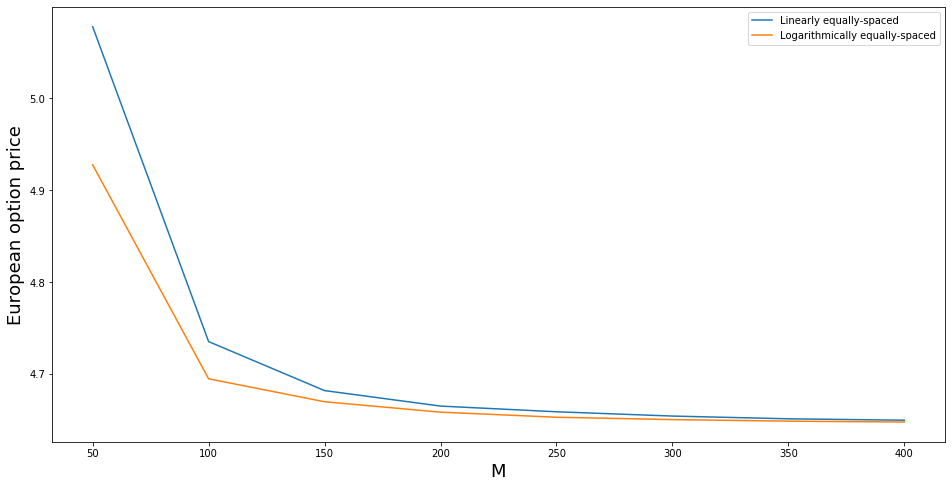

In [86]:
x_range = np.arange(50, 401, 50)
plt.figure(figsize=(16,8))
plt.plot(x_range, E_linear, label='Linearly equally-spaced')
plt.plot(x_range, E_loglinear, label='Logarithmically equally-spaced')
plt.xlabel('M', fontsize=18)
plt.ylabel('European option price', fontsize=18)
plt.legend()
plt.show()

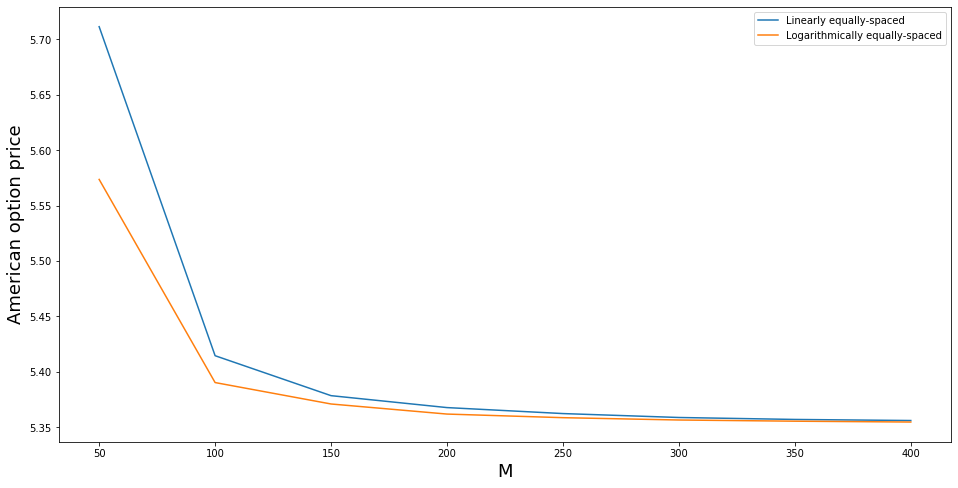

In [97]:
A_linear=np.zeros(8)
A_loglinear=np.zeros(8)
for M_1 in range(50, 401, 50):
    i=int(M_1/50-1)
    A_linear[i]=BT_average_A_option_price(S_t0, K, r, q, sigma, dt, t0, T, n_before, M_1, n, S_ave_t0)
    A_loglinear[i]=BT_average_A_option_price_loglinear(S_t0, K, r, q, sigma, dt, t0, T, n_before, M_1, n, S_ave_t0)

x_range = np.arange(50, 401, 50)
plt.figure(figsize=(16,8))
plt.plot(x_range, A_linear, label='Linearly equally-spaced')
plt.plot(x_range, A_loglinear, label='Logarithmically equally-spaced')
plt.xlabel('M', fontsize=18)
plt.ylabel('American option price', fontsize=18)
plt.legend()
plt.show()

## Bonus 2 (5 points)

Compare the computational time of the following three methods to locate the positions of $A_u$ and $A_d$.

$
\left\{
    \begin{array}{ll}
        \mbox{Sequential search (the traditional way)}
        \\
        \mbox{Binary search}
        \\
        \mbox{Linear interpolation method}
    \end{array}
\right.
$

In [23]:
n_before=int(n*t0/(T-t0))
dt=(T-t0)/n
u=np.exp(sigma*np.sqrt(dt))
d=1/u
p=(np.exp((r-q)*dt)-d)/(u-d)

In [24]:
import math

In [25]:
### binary search

In [76]:
### European option
def BT_average_E_option_price_binary(S_t0, K, r, q, sigma, dt, t0, T, n_before, M, n, S_ave_t0):
    S_t=np.zeros((n+1, n+1))
    for i in range(n-1, n+1, 1):
        for j in range(0, i+1, 1):
            S_t[i,j]=S_t0*u**(i-j)*d**j
    if n%2: # n是奇數
        S_t[n-1,math.floor(n/2)]=S_t0
    else: # n是偶數
        S_t[n,math.floor(n/2)]=S_t0
    for i in range(n-2, -1, -1):
        for j in range(0, i+1, 1):
            S_t[i,j]=S_t[i+2,j+1]
    # average price
    S_ave=np.zeros((n+1, n+1, M+1))
    S_ave[0,0,0]=S_ave_t0
    for i in range(1, n+1, 1):
        for j in range(0, i+1, 1):
            S_ave[i,j,0]=(S_ave[0,0,0]*(n_before+1)+S_ave[0,0,0]*u*(1-u**(i-j))/(1-u)+S_ave[0,0,0]*u**(i-j)*d*(1-d**j)/(1-d))/(n_before+i+1)
            S_ave[i,j,M]=(S_ave[0,0,0]*(n_before+1)+S_ave[0,0,0]*d*(1-d**j)/(1-d)+S_ave[0,0,0]*d**j*u*(1-u**(i-j))/(1-u))/(n_before+i+1)
            for k in range(1, M, 1):
                S_ave[i,j,k]=((M-k)*S_ave[i,j,0]+k*S_ave[i,j,M])/M
    call=np.zeros((n+1, n+1, M+1))
    # i=n
    for j in range(0, n+1, 1):
        for k in range(0, M+1, 1):
            call[n,j,k]=max(S_ave[n,j,k]-K,0)
    # backward induction
    for i in range(n-1, -1, -1):
        for j in range(0, i+1, 1):
            for k in range(0, M+1, 1):
                A_u=((i+n_before+1)*S_ave[i,j,k]+S_t[i+1,j])/(i+n_before+2) #S_t0*u**(i+1-j)*d**j
                #A_d=((i+n_before+1)*S_ave[i,j,k]+S_t[i+1,j+1])/(i+n_before+2) #S_t0*u**(i+1-j-1)*d**(j+1)
                # binary search
                C=int(M/2)
                if A_u>S_ave[i+1,j,0]:
                    C_u=call[i+1,j,0]
                    continue
                elif A_u<S_ave[i+1,j,M]:
                    C_u=call[i+1,j,M]
                    continue
                else:
                    A_next=0
                    B_next=M
                    C_next=C
                    u_num_iterations=0
                    while u_num_iterations<M:
                        if A_u==S_ave[i+1,j,C_next]:
                            C_u=call[i+1,j,C_next]
                            break
                        elif abs(A_next-B_next)<=1:
                            if A_u==S_ave[i+1,j,A_next]:
                                C_u=call[i+1,j,A_next]
                                break
                            elif A_u==S_ave[i+1,j,B_next]:
                                C_u=call[i+1,j,B_next]
                                break
                            elif (A_u>=S_ave[i+1,j,A_next])&(A_u<=S_ave[i+1,j,A_next-1]):
                                k_u=A_next
                                if S_ave[i+1,j,k_u-1]-S_ave[i+1,j,k_u]==0:
                                    w_u=0
                                else:
                                    w_u=(S_ave[i+1,j,k_u-1]-A_u)/(S_ave[i+1,j,k_u-1]-S_ave[i+1,j,k_u])
                                C_u=w_u*call[i+1,j,k_u]+(1-w_u)*call[i+1,j,k_u-1]
                                break
                            else:
                                k_u=B_next
                                if S_ave[i+1,j,k_u-1]-S_ave[i+1,j,k_u]==0:
                                    w_u=0
                                else:
                                    w_u=(S_ave[i+1,j,k_u-1]-A_u)/(S_ave[i+1,j,k_u-1]-S_ave[i+1,j,k_u])
                                C_u=w_u*call[i+1,j,k_u]+(1-w_u)*call[i+1,j,k_u-1]
                                break
                        else:
                            u_num_iterations+=1
                            if A_u<S_ave[i+1,j,C_next]:
                                A_next=C_next
                                C_next=int((B_next+C_next)/2)
                            elif A_u>S_ave[i+1,j,C_next]:
                                B_next=C_next
                                C_next=int((A_next+C_next)/2)
            for k in range(0,M+1,1):
                A_d=((i+n_before+1)*S_ave[i,j,k]+S_t[i+1,j+1])/(i+n_before+2)
                if A_d>S_ave[i+1,j+1,0]:
                    C_d=call[i+1,j+1,0]
                    continue
                elif A_d<S_ave[i+1,j+1,M]:
                    C_d=call[i+1,j+1,M]
                    continue
                else:
                    C=int(M/2)
                    a_next=0
                    b_next=M
                    c_next=C
                    d_num_iterations=0
                    while d_num_iterations<M:
                        if A_d==S_ave[i+1,j+1,c_next]:
                            C_d=call[i+1,j+1,c_next]
                            break
                        elif abs(a_next-b_next)<=1:
                            if A_d==S_ave[i+1,j+1,a_next]:
                                C_d=call[i+1,j+1,a_next]
                                break
                            elif A_d==S_ave[i+1,j+1,b_next]:
                                C_d=call[i+1,j+1,b_next]
                                break
                            elif (A_d>=S_ave[i+1,j+1,a_next])&(A_d<=S_ave[i+1,j+1,a_next-1]):
                                k_d=a_next
                                if S_ave[i+1,j+1,k_d-1]-S_ave[i+1,j+1,k_d]==0:
                                    w_d=0
                                else:
                                    w_d=(S_ave[i+1,j+1,k_d-1]-A_d)/(S_ave[i+1,j+1,k_d-1]-S_ave[i+1,j+1,k_d])
                                C_d=w_d*call[i+1,j+1,k_d]+(1-w_d)*call[i+1,j+1,k_d-1]
                                break
                            else:
                                k_d=b_next
                                if S_ave[i+1,j+1,k_d-1]-S_ave[i+1,j+1,k_d]==0:
                                    w_d=0
                                else:
                                    w_d=(S_ave[i+1,j+1,k_d-1]-A_d)/(S_ave[i+1,j+1,k_d-1]-S_ave[i+1,j+1,k_d])
                                C_d=w_d*call[i+1,j+1,k_d]+(1-w_d)*call[i+1,j+1,k_d-1]
                                break
                        else:
                            d_num_iterations+=1
                            if A_u<S_ave[i+1,j+1,c_next]:
                                a_next=c_next
                                c_next=int((b_next+c_next)/2)
                            elif A_u>S_ave[i+1,j+1,c_next]:
                                b_next=c_next
                                c_next=int((a_next+c_next)/2)
                call[i,j,k]=(p*C_u+(1-p)*C_d)*np.exp(-r*dt)
    return call

print('The option value is', BT_average_E_option_price_binary(S_t0, K, r, q, sigma, dt, t0, T, n_before, M, n, S_ave_t0)[1])

The option value is [[0.00407701 0.00407701 0.00407701 ... 0.00407701 0.00407701 0.00407701]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [47]:
a=BT_average_E_option_price_binary(S_t0, K, r, q, sigma, dt, t0, T, n_before, M, n, S_ave_t0)
b=BT_average_E_option_price(S_t0, K, r, q, sigma, dt, t0, T, n_before, M, n, S_ave_t0)

In [57]:
for i in range(n, -1, -1):
    if abs(a[i,0,0]-b[i,0,0])>0.00000000000001:
        print(i)
        print(a[i,0,0])
        print(b[i,0,0])
        break
    else:
        continue

94
606.8257184252438
606.8257184252437


In [62]:
i=99
for j in range(0,i+1,1):
    for k in range(0,M+1,1):
        if a[i,j,k]!=b[i,j,k]:
            print(i,j,k)
            break

99 1 4
99 2 3
99 3 43
99 4 20
99 5 11
99 6 21
99 7 9
99 8 29
99 9 32
99 10 12
99 11 14
99 12 30
99 13 16
99 14 16
99 16 92
99 17 49
99 18 27
99 19 57
99 20 93
99 21 68
99 22 71
99 24 40
99 26 47
99 29 53
99 33 68
99 37 87
99 39 93


In [61]:
a[99,0,0]

625.9807204408802

In [60]:
b[99,0,0]

625.9807204408802

In [53]:
a[24]

array([[68.27009296, 68.27009296, 68.27009296, ..., 68.27009296,
        68.27009296, 68.27009296],
       [60.7242276 , 60.70985284, 60.69547807, ..., 59.31550048,
        59.30112571, 59.28675094],
       [53.6648068 , 53.63845835, 53.6121099 , ..., 51.08265866,
        51.05631021, 51.02996176],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [52]:
b[24]

array([[68.27009296, 68.27009296, 68.27009296, ..., 68.27009296,
        68.27009296, 68.27009296],
       [60.7242276 , 60.70985284, 60.69547807, ..., 59.31550048,
        59.30112571, 59.28675094],
       [53.6648068 , 53.63845835, 53.6121099 , ..., 51.08265867,
        51.05631022, 51.02996177],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [31]:
BT_average_E_option_price_binary(S_t0, K, r, q, sigma, dt, t0, T, n_before, M, n, S_ave_t0)[93]

array([[600.8641464 , 600.8641464 , 600.8641464 , ..., 600.8641464 ,
        600.8641464 , 600.8641464 ],
       [588.31604239, 587.94156245, 587.56708252, ..., 551.61700879,
        551.24252886, 550.86804892],
       [575.22633097, 574.52159105, 573.81685113, ..., 506.1618188 ,
        505.45707888, 504.75233896],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [32]:
BT_average_E_option_price(S_t0, K, r, q, sigma, dt, t0, T, n_before, M, n, S_ave_t0)[93]

array([[600.8641464 , 600.8641464 , 600.8641464 , ..., 600.8641464 ,
        600.8641464 , 600.8641464 ],
       [588.31604239, 587.94156245, 587.56708252, ..., 551.61700879,
        551.24252886, 550.86804892],
       [575.22633097, 574.52159105, 573.81685113, ..., 506.1618188 ,
        505.45707888, 504.75233896],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [ ]:
### American option
def BT_average_A_option_price_binary(S_t0, K, r, q, sigma, dt, t0, T, n_before, M, n, S_ave_t0):
    S_t=np.zeros((n+1, n+1))
    for i in range(n-1, n+1, 1):
        for j in range(0, i+1, 1):
            S_t[i,j]=S_t0*u**(i-j)*d**j
    if n%2: # n是奇數
        S_t[n-1,math.floor(n/2)]=S_t0
    else: # n是偶數
        S_t[n,math.floor(n/2)]=S_t0
    for i in range(n-2, -1, -1):
        for j in range(0, i+1, 1):
            S_t[i,j]=S_t[i+2,j+1]
    # average price
    S_ave=np.zeros((n+1, n+1, M+1))
    S_ave[0,0,0]=S_ave_t0
    for i in range(1, n+1, 1):
        for j in range(0, i+1, 1):
            S_ave[i,j,0]=(S_ave[0,0,0]*(n_before+1)+S_ave[0,0,0]*u*(1-u**(i-j))/(1-u)+S_ave[0,0,0]*u**(i-j)*d*(1-d**j)/(1-d))/(n_before+i+1)
            S_ave[i,j,M]=(S_ave[0,0,0]*(n_before+1)+S_ave[0,0,0]*d*(1-d**j)/(1-d)+S_ave[0,0,0]*d**j*u*(1-u**(i-j))/(1-u))/(n_before+i+1)
            for k in range(1, M, 1):
                S_ave[i,j,k]=((M-k)*S_ave[i,j,0]+k*S_ave[i,j,M])/M
    call=np.zeros((n+1, n+1, M+1))
    # i=n
    for j in range(0, n+1, 1):
        for k in range(0, M+1, 1):
            call[n,j,k]=max(S_ave[n,j,k]-K,0)
    # backward induction
    for i in range(n-1, -1, -1):
        for j in range(0, i+1, 1):
            for k in range(0, M+1, 1):
                A_u=((i+n_before+1)*S_ave[i,j,k]+S_t[i+1,j])/(i+n_before+2) #S_t0*u**(i+1-j)*d**j
                A_d=((i+n_before+1)*S_ave[i,j,k]+S_t[i+1,j+1])/(i+n_before+2) #S_t0*u**(i+1-j-1)*d**(j+1)
                # binary search
                C=int(M/2)
                A_next=0
                B_next=M
                C_next=C
                u_num_iterations=0
                while u_num_iterations<M:
                    if A_u==S_ave[i+1,j,C_next]:
                        C_u=call[i+1,j,C_next]
                        break
                    elif abs(A_next-B_next)<=1:
                        if A_u==S_ave[i+1,j,A_next]:
                            C_u=call[i+1,j,A_next]
                        elif A_u==S_ave[i+1,j,B_next]:
                            C_u=call[i+1,j,B_next]
                        else:
                            k_u=B_next
                            if S_ave[i+1,j,k_u-1]-S_ave[i+1,j,k_u]==0:
                                w_u=0
                            else:
                                w_u=(S_ave[i+1,j,k_u-1]-A_u)/(S_ave[i+1,j,k_u-1]-S_ave[i+1,j,k_u])
                            C_u=w_u*call[i+1,j,k_u]+(1-w_u)*call[i+1,j,k_u-1]
                        break
                    else:
                        u_num_iterations+=1
                        if A_u<S_ave[i+1,j,C_next]:
                            A_next=C_next
                            C_next=int((B_next+C_next)/2)
                        elif A_u>S_ave[i+1,j,C_next]:
                            B_next=C_next
                            C_next=int((A_next+C_next)/2)
                a_next=0
                b_next=M
                c_next=C
                d_num_iterations=0
                while d_num_iterations<M:
                    if A_d==S_ave[i+1,j+1,c_next]:
                        C_d=call[i+1,j+1,c_next]
                        break
                    elif abs(a_next-b_next)<=1:
                        if A_d==S_ave[i+1,j+1,a_next]:
                            C_d=call[i+1,j+1,a_next]
                        elif A_d==S_ave[i+1,j+1,b_next]:
                            C_d=call[i+1,j+1,b_next]
                        else:
                            k_d=b_next
                            if S_ave[i+1,j+1,k_d-1]-S_ave[i+1,j+1,k_d]==0:
                                w_d=0
                            else:
                                w_d=(S_ave[i+1,j+1,k_d-1]-A_d)/(S_ave[i+1,j+1,k_d-1]-S_ave[i+1,j+1,k_d])
                            C_d=w_d*call[i+1,j+1,k_d]+(1-w_d)*call[i+1,j+1,k_d-1]
                        break
                    else:
                        d_num_iterations+=1
                        if A_u<S_ave[i+1,j+1,c_next]:
                            a_next=c_next
                            c_next=int((b_next+c_next)/2)
                        elif A_u>S_ave[i+1,j+1,c_next]:
                            b_next=c_next
                            c_next=int((a_next+c_next)/2)
                call[i,j,k]=max(S_ave[i,j,k]-K,(p*C_u+(1-p)*C_d)*np.exp(-r*dt))
    return call[0,0,0]

print('The option value is', BT_average_A_option_price_binary(S_t0, K, r, q, sigma, dt, t0, T, n_before, M, n, S_ave_t0))

In [ ]:
### linear interpolation method

In [ ]:
### European option
def BT_average_E_option_price_interpolation(S_t0, K, r, q, sigma, dt, t0, T, n_before, M, n, S_ave_t0):
    S_t=np.zeros((n+1, n+1))
    for i in range(n-1, n+1, 1):
        for j in range(0, i+1, 1):
            S_t[i,j]=S_t0*u**(i-j)*d**j
    if n%2: # n是奇數
        S_t[n-1,math.floor(n/2)]=S_t0
    else: # n是偶數
        S_t[n,math.floor(n/2)]=S_t0
    for i in range(n-2, -1, -1):
        for j in range(0, i+1, 1):
            S_t[i,j]=S_t[i+2,j+1]
    # average price
    S_ave=np.zeros((n+1, n+1, M+1))
    S_ave[0,0,0]=S_ave_t0
    for i in range(1, n+1, 1):
        for j in range(0, i+1, 1):
            S_ave[i,j,0]=(S_ave[0,0,0]*(n_before+1)+S_ave[0,0,0]*u*(1-u**(i-j))/(1-u)+S_ave[0,0,0]*u**(i-j)*d*(1-d**j)/(1-d))/(n_before+i+1)
            S_ave[i,j,M]=(S_ave[0,0,0]*(n_before+1)+S_ave[0,0,0]*d*(1-d**j)/(1-d)+S_ave[0,0,0]*d**j*u*(1-u**(i-j))/(1-u))/(n_before+i+1)
            for k in range(1, M, 1):
                S_ave[i,j,k]=((M-k)*S_ave[i,j,0]+k*S_ave[i,j,M])/M
    call=np.zeros((n+1, n+1, M+1))
    # i=n
    for j in range(0, n+1, 1):
        for k in range(0, M+1, 1):
            call[n,j,k]=max(S_ave[n,j,k]-K,0)
    # backward induction
    for i in range(n-1, -1, -1):
        for j in range(0, i+1, 1):
            for k in range(0, M+1, 1):
                A_u=((i+n_before+1)*S_ave[i,j,k]+S_t[i+1,j])/(i+n_before+2) #S_t0*u**(i+1-j)*d**j
                A_d=((i+n_before+1)*S_ave[i,j,k]+S_t[i+1,j+1])/(i+n_before+2) #S_t0*u**(i+1-j-1)*d**(j+1)
                # linear interpolation
                if A_u>S_ave[i+1,j,0]:
                    C_u=call[i+1,j,0]
                elif A_u<S_ave[i+1,j,M]:
                    C_u=call[i+1,j,M]
                else:
                    k_u_hat=M*(S_ave[i,j,0]-A_u)/(S_ave[i,j,0]-S_ave[i,j,M])
                    if A_u>=S_ave[i,j,math.ceil(k_u_hat)]&&A_u<=S_ave[i,j,math.ceil(k_u_hat)-1]:
                        k_u=math.ceil(k_u_hat)
                        if S_ave[i+1,j,k_u-1]-S_ave[i+1,j,k_u]==0:
                            w_u=0
                        else:
                            w_u=(S_ave[i+1,j,k_u-1]-A_u)/(S_ave[i+1,j,k_u-1]-S_ave[i+1,j,k_u])
                        C_u=w_u*call[i+1,j,k_u]+(1-w_u)*call[i+1,j,k_u-1]
                    elif A_u>=S_ave[i,j,math.floor(k_u_hat)]&&A_u<=S_ave[i,j,math.floor(k_u_hat)-1]:
                        k_u=math.ceil(u_d_hat)
                        if S_ave[i+1,j,k_u-1]-S_ave[i+1,j,k_u]==0:
                            w_u=0
                        else:
                            w_u=(S_ave[i+1,j,k_u-1]-A_u)/(S_ave[i+1,j,k_u-1]-S_ave[i+1,j,k_u])
                        C_u=w_u*call[i+1,j,k_u]+(1-w_u)*call[i+1,j,k_u-1]
                
                
                call[i,j,k]=(p*C_u+(1-p)*C_d)*np.exp(-r*dt)
    return call[0,0,0]

print('The option value is', BT_average_E_option_price_interpolation(S_t0, K, r, q, sigma, dt, t0, T, n_before, M, n, S_ave_t0))